### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Purchasing Behavior by Income](#section3_1)
    * [More Purchasing Behavior by Income](#section3_2)
    * [Purchasing Behavior by Education](#section3_3)
    * [Purchasing Behavior by Age](#section3_4)
    * [comparing offers accepted between the 5 campaigns ](#section3_5)
* [Conclusion](#conclusion)
  

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.



#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
marketing_data = pd.read_csv("marketing_data.csv")

pd.set_option('display.max_columns', 28)
print(marketing_data.head())
print(marketing_data.shape)


      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProd

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [3]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. 

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [7]:
# Clean Columns

# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
print(marketing_data.columns)

#taking dollar sign out of values and convert to float
marketing_data['income'] = marketing_data['income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['income'].describe()


Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

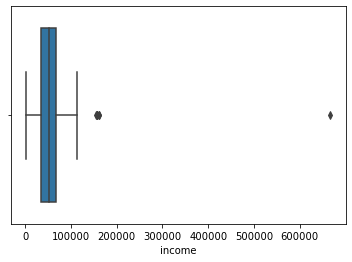

In [8]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

This boxplot shows a major outlier on the right, so it is removed from the dataset. 

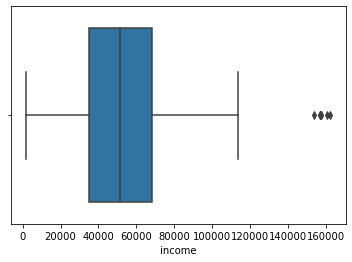

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [9]:
# remove incomes above 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


marketing_data['income'].describe()

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [10]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2022. 
* Any outliers in `age` that could affect the analysis are removed. 

In [11]:
marketing_data['age'] = 2022 - marketing_data['year_birth']
marketing_data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,...,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,...,1,4,4,6,1,0,0,0,0,0,1,0,SP,52
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,...,1,7,3,7,5,0,0,0,0,1,1,0,CA,61
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,...,1,3,2,5,2,0,0,0,0,0,0,0,US,64
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,...,1,1,0,2,7,0,0,0,0,0,0,0,AUS,55
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,...,2,3,1,2,7,1,0,0,0,0,1,0,SP,33


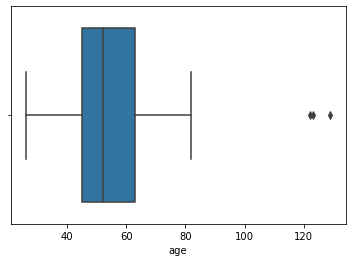

count    2215.000000
mean       53.183296
std        11.987000
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: age, dtype: float64

In [12]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

In [13]:
marketing_data = marketing_data[marketing_data["age"] < 100]

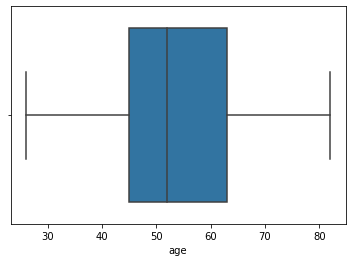

count    2212.000000
mean       53.086347
std        11.701599
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

In [14]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

After removing the major outliers the `age` distribution is symmetric and ready for analysis.

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA:  
  There is no missing data or other issues, so it can be left as is.

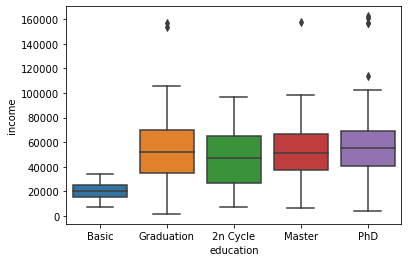

In [15]:
plt.figure()
sns.boxplot(x = marketing_data["education"], y=marketing_data["income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

#### Purchasing Behavior by Income <a class="anchor" id="section3_1"></a>

Now it's time to start looking into the big question. A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

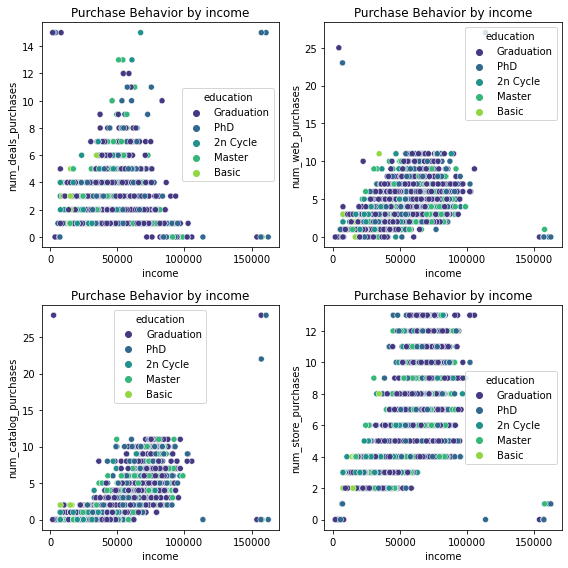

In [16]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")

plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident.

  It is also difficult to conclude any patterns associated with `education` in the plots, so further analysis will be done on this variable.

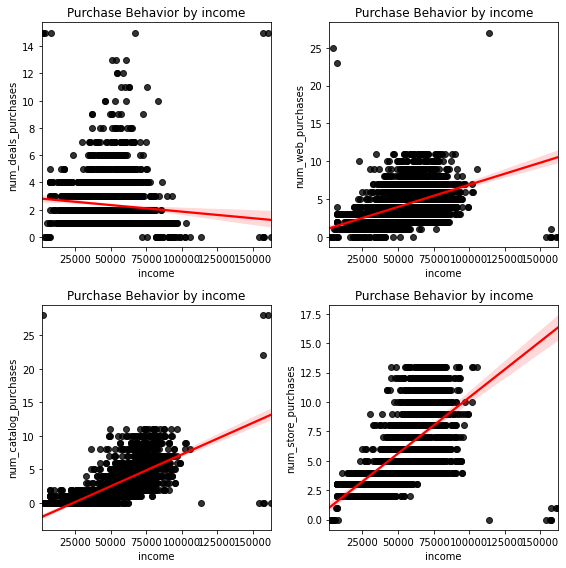

In [17]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
fig = plt.figure(figsize=(8,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [18]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]
print(marketing_data.head())

      id  year_birth   education marital_status   income  kidhome  teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0     6/16/14        0        189         104                379   
1     6/15/14        0        464           5                 64   
2     5/13/14        0        134          11                 59   
3     5/11/14        0         10           0                  1   
4      4/8/14        0          6          16                 24   

   mnt_fish_products  mnt_sweet_products  ...  num_web_purchases  \
0                111                 189  ...   

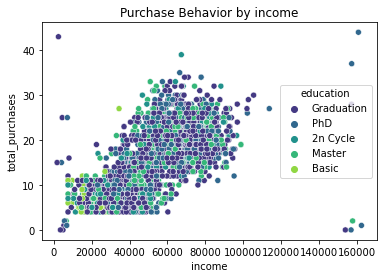

In [19]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['education'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

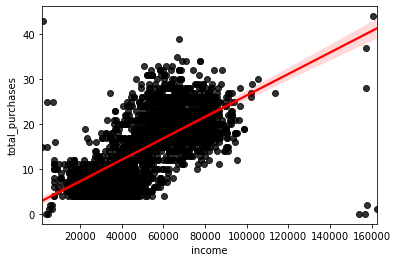

In [20]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to conclude any relationship between the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

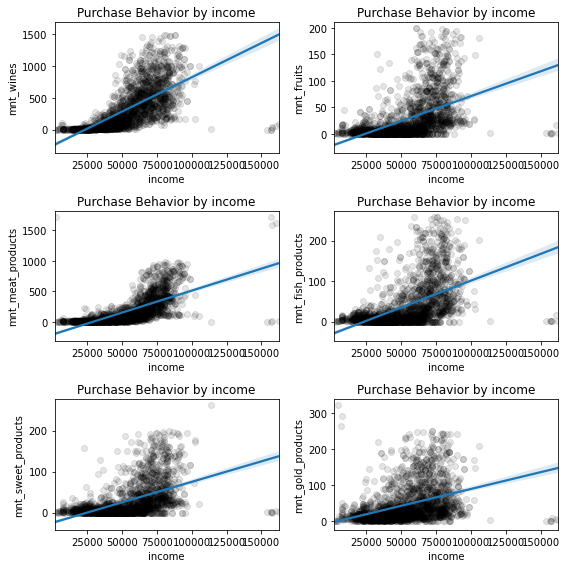

In [21]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(8,8))
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # set up subplots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.regplot(y= marketing_data[amounts_list[i]], x=marketing_data["income"],
                 scatter_kws= {'color': 'black', 'alpha': .1 })
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable.

#### Purchasing Behavior by Education <a class="anchor" id="section3_3"></a>

A barplot is made to show the relation between education the added column 'total_purchases'

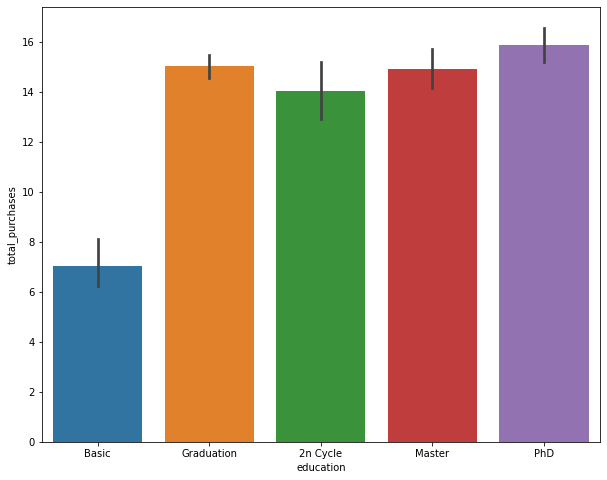

In [22]:
#order list
order_education = ["Basic", "Graduation", "2n Cycle", "Master", "PhD"]

fig= plt.figure(figsize=(10, 8))

sns.barplot(data= marketing_data, x='education', y='total_purchases', order= order_education)

plt.show()

We can observe that the least total amount of purchases is done by the group with basic level of education while the highest is made with the PhD level.

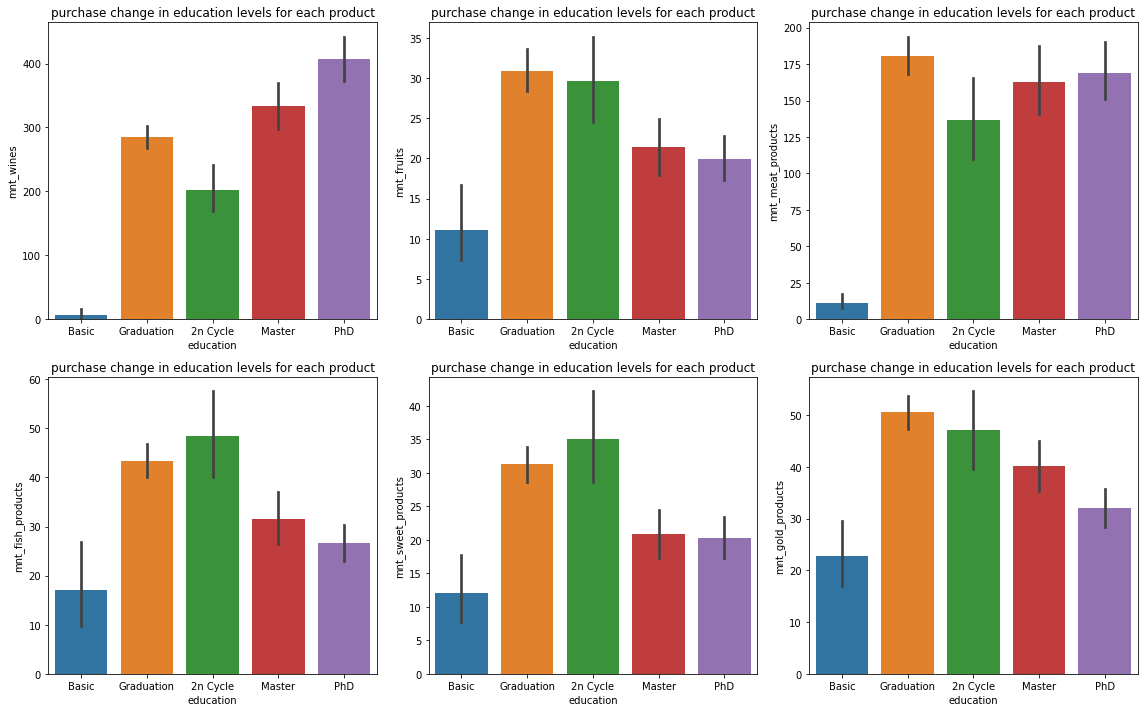

In [23]:
# barplot figures are made to show the relation between education and each of the products column:

amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot= 0
fig = plt.figure(figsize= (16, 10))

# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    #set up subplots:
    ax = plt.subplot(2, 3, plot)
    # barplots showing the amount_{product} vs education level:
    sns.barplot(y= marketing_data[amounts_list[i]], x= marketing_data['education'], order= order_education)

    plt.title('purchase change in education levels for each product')
plt.tight_layout()
plt.show()

After observing the plots detailing the relationship between education level, and purchasing behavior, the following can be seen:

all store do not have many shoppers with a Basic education level.
We can also observe the highest group's education level for every product.

#### Purchasing Behavior by Age <a class="anchor" id="section3_4"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


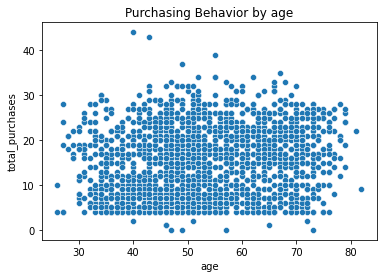

In [24]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=marketing_data["age"], y=marketing_data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

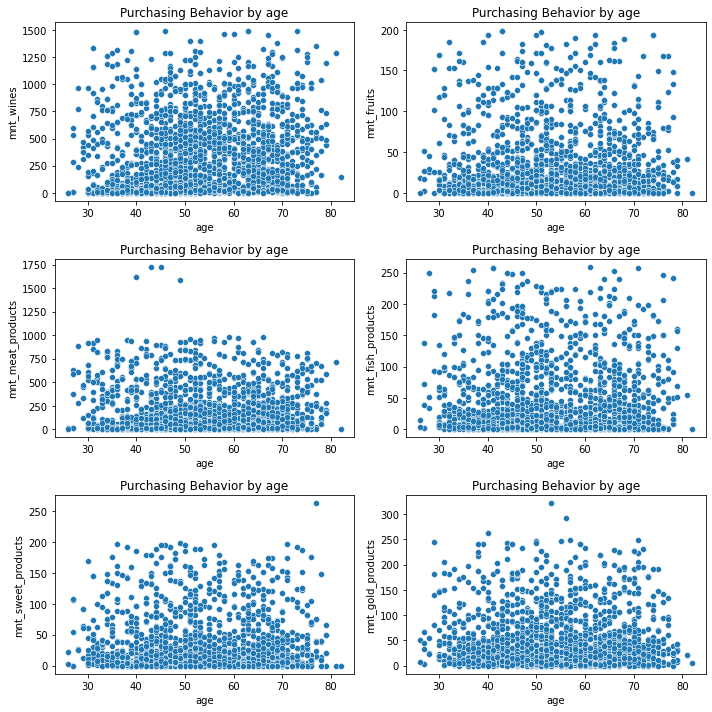

In [25]:
# amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(10,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

Again, it is difficult to see any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

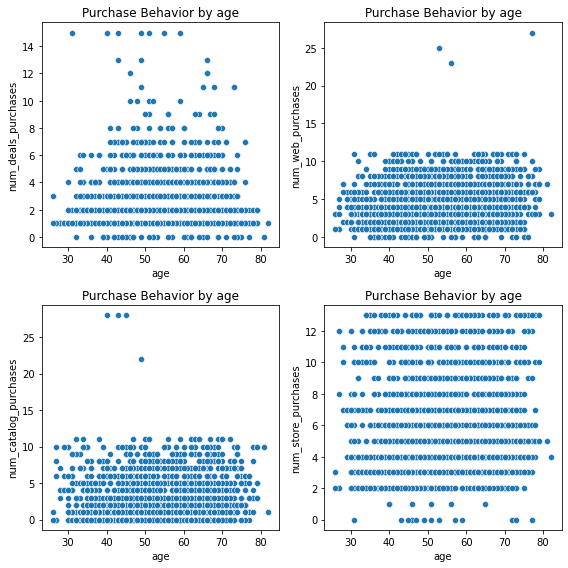

In [26]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.scatterplot(x=marketing_data["age"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show();

Again, t is difficult to see any pattern between `age` and any `num_{type}_purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

Those categorical variables may give a clear pattern.

In [27]:
print(np.min(marketing_data['age']))
print(np.max(marketing_data['age']))

# function that breaks up age into a categories
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)

print('\n' + 'Age Groups:' + '\n')
print(marketing_data['age_group'].groupby(marketing_data['age_group']).count())
    

26
82

Age Groups:

age_group
18 to 35         146
36 to 50         844
51 to 70        1045
71 and Older     177
Name: age_group, dtype: int64


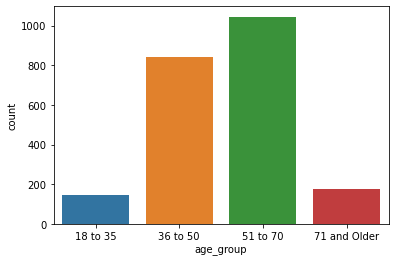

In [28]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(marketing_data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`) to make plotting a grouped bar graph easier.

In [29]:
# creating new df 'age_plus_amounts'
age_plus_amounts = marketing_data[['age_group', 'age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products']].groupby(marketing_data['age_group']).sum().reset_index()
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   4735      42256        5049              33477   
1      36 to 50  37312     202869       19599             123281   
2      51 to 70  62351     357309       28147             175138   
3  71 and Older  13029      72862        5446              37574   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               6680                4872               7031  
1              28328               20797              32846  
2              39807               28506              48451  
3               8464                5652               8836  


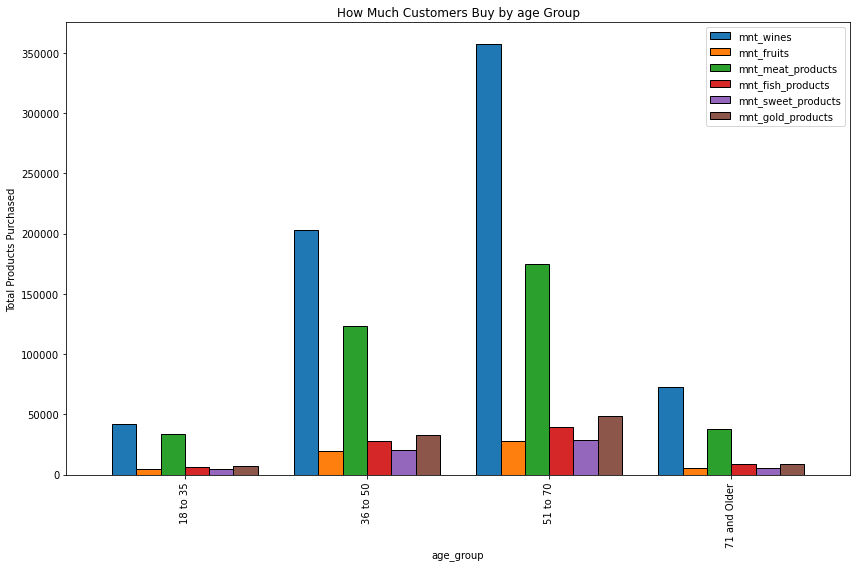

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=.8, edgecolor='black')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()


Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. We can also notice that age group '51 to 70' have the  highest total products purchased for every product.  

  The next analysis of interest is to see if `age_group` affects `number_{type}_purchases`. 

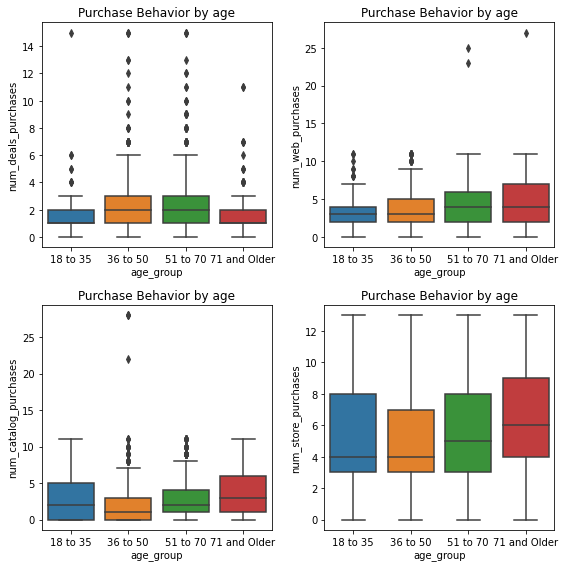

In [31]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))

# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1

    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

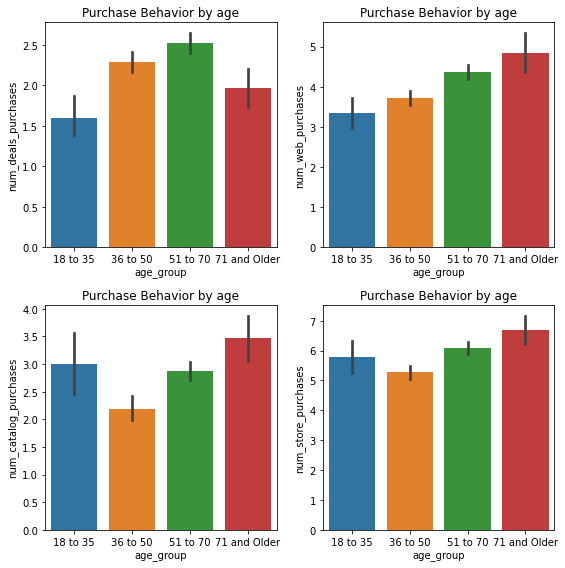

In [32]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))

# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1

    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    
    # scatterplot of of num purchases vs. age
    sns.barplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* `36 to 50` and `51 to 70` age groups are interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* a positive linear relation is noticable between age and online purcahses.


This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

#### comparing offers accepted between the 5 campaigns <a class="anchor" id="section3_5"></a>

In this section, we will be plotting a barpplot to compare the amount of offers accepted through each of the five campaigns.
We notice that the second campagin is obviously the campagin with the least offers accepted.

In [33]:
cmp= marketing_data[["accepted_cmp1", "accepted_cmp2", "accepted_cmp3", "accepted_cmp4", "accepted_cmp5"]].sum().reset_index()
cmp.columns = ['campaign', 'count']
cmp

,campaign,count
0,accepted_cmp1,142
1,accepted_cmp2,30
2,accepted_cmp3,163
3,accepted_cmp4,164
4,accepted_cmp5,161


Text(0.5, 1.0, 'Number of acccepted offers for each campaign')

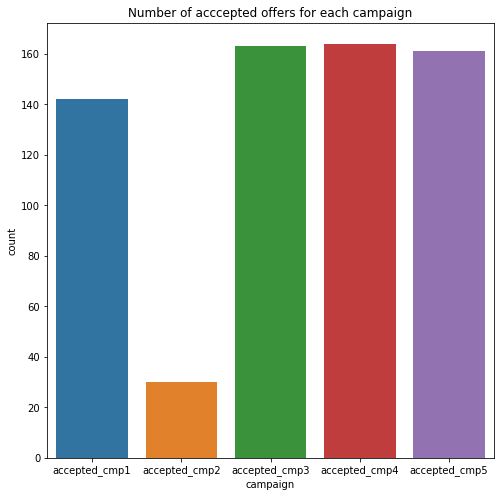

In [34]:
fig = plt.figure(figsize= (8, 8))
ax = sns.barplot(data= cmp, x= 'campaign', y= 'count')
plt.title('Number of acccepted offers for each campaign')

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown  that`income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

In addition, the figure of results from existing marketing campaings shows that campaign 2 has a drastically lower amount of accepted offers compared to the other campaigns, which is helpful for the marketing team to acknowledge.